In [1]:
!pip install chart-studio

In [2]:
!pip install cufflinks

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [4]:
import cufflinks as cf
cf.go_offline()

In [5]:
import pandas as pd
kghm = pd.read_csv('kgh_d.csv', index_col=0,parse_dates=True)
kghm.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2015-01-02,102.45,102.83,101.97,102.40,309987
2015-01-05,102.16,102.88,99.91,100.09,479228
2015-01-07,100.53,105.45,99.67,104.89,966372
2015-01-08,105.35,107.15,105.35,107.11,711805
2015-01-09,107.15,107.15,103.87,104.33,563221


In [6]:
cu = pd.read_csv('ca_c_f_d.csv', index_col=0,parse_dates=True)
cu.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
Data,,,,
2015-01-02,6309.0,6309.0,6309.0,6309.0
2015-01-05,6216.0,6216.0,6216.0,6216.0
2015-01-06,6191.0,6191.0,6191.0,6191.0
2015-01-07,6170.0,6170.0,6170.0,6170.0
2015-01-08,6230.5,6230.5,6230.5,6230.5


In [7]:
import pandas as pd
import plotly.graph_objs as go
from plotly import subplots
import plotly.offline as pyo

In [8]:
fig = subplots.make_subplots(rows=2,cols=1,subplot_titles=['KGHM','Miedź'],shared_xaxes=True)

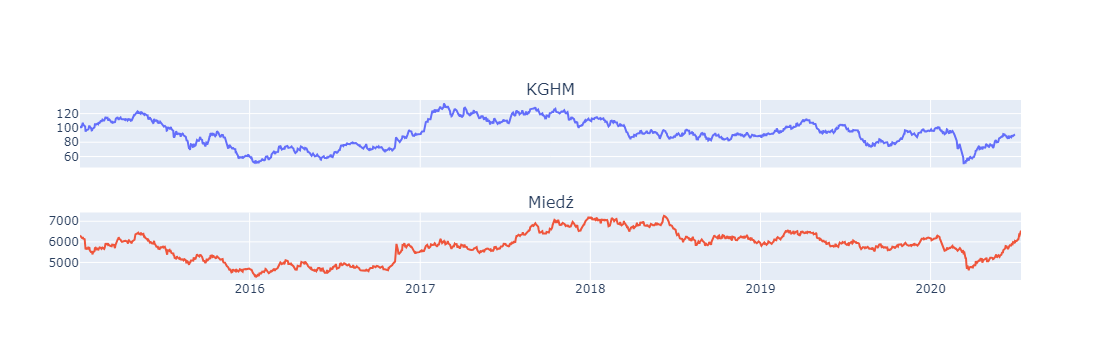

In [9]:
fig.add_trace(go.Scatter(
    x=kghm.index,
    y=kghm['Zamkniecie'],
    fillcolor='blue'), 1, 1)

fig.add_trace(go.Scatter(
    x=cu.index,
    y=cu['Zamkniecie'],
    fillcolor='red'), 2, 1)

fig.update_layout(showlegend=False)
pyo.iplot(fig)

In [10]:
merged_df = pd.merge(kghm['Zamkniecie'], cu['Zamkniecie'], left_index=True, right_index=True, how='outer')
merged_df.fillna(method='ffill', inplace=True)
merged_df

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_16688\3607647268.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Zamkniecie_x,Zamkniecie_y
Data,,
2015-01-02,102.40,6309.0
2015-01-05,100.09,6216.0
2015-01-06,100.09,6191.0
2015-01-07,104.89,6170.0
2015-01-08,107.11,6230.5
...,...,...
2020-07-07,90.90,6086.0
2020-07-08,90.90,6194.0
2020-07-09,90.90,6339.5


In [ ]:
merged_df.rename(columns={'Zamkniecie_x': 'KGHM', 'Zamkniecie_y': 'Miedź'}, inplace=True)
merged_df